TASK 1 Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

Downloaded and loaded the .zipfile in collab and using it

In [1]:
import zipfile
import os

with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip", "r") as zip_ref:
    zip_ref.extractall("house_prices")

# Change working directory (optional)
os.chdir("house_prices")

# Verify files
!ls


data_description.txt  sample_submission.csv  test.csv  train.csv


importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

loading the dataset

In [4]:
df=pd.read_csv("train.csv")
df.shape
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].head()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000


Exploratory Data Analaysis.
checking missing values

In [6]:
missing=df.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(10) #tells whichever column has missing values so that we can handle in prior


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


coorelation analysis - to find most related features to salePrice

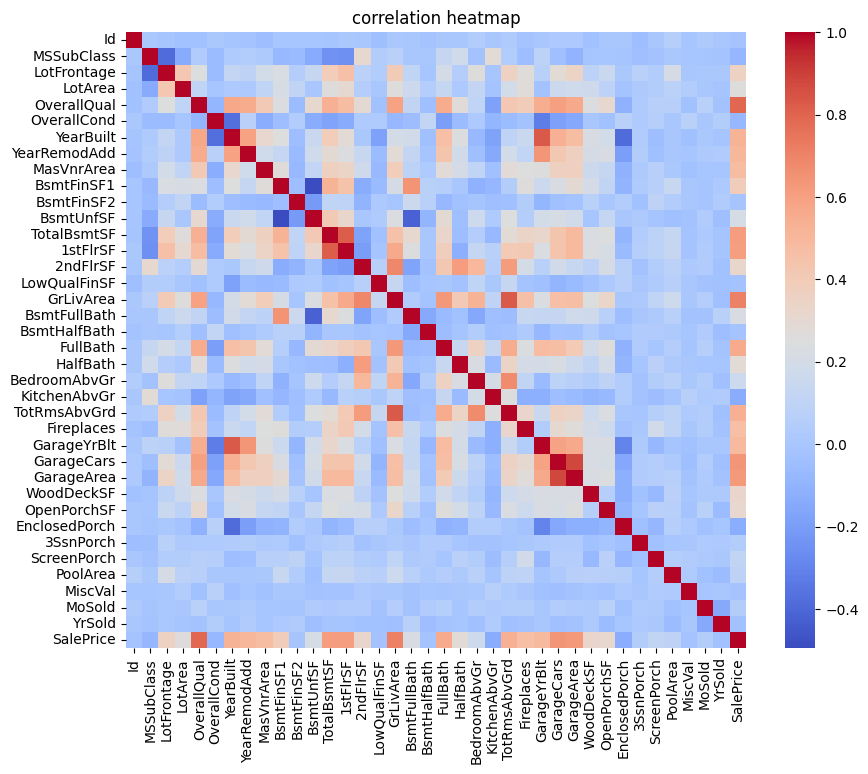

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

so based on correlation we will use strong predictors

In [9]:
features=['GrLivArea', 'GarageCars', 'TotalBsmtSF','FullBath', 'YearBuilt', 'Neighborhood']
target='SalePrice'
data=df[features + [target]].dropna()

Data Preprocessing
1. encode categorical data to numeric format using One-Hot encoding

In [10]:
data=pd.get_dummies(data, columns=['Neighborhood'], drop_first=True)

2.splitting the dataset into 80%training and 20% testing data

In [11]:
X=data.drop('SalePrice', axis=1) #removing target column from dataset to get only input features
y=data['SalePrice']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=42)

Standardize Numeric features- feature scaling using z-score normalsiation .
mean=0 and sd=1
In raw data, some features (like 'GrLivArea') might have values in thousands, while others (like 'GarageCars') are single digits.



In [12]:
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train) # calculates mean and standard deviation and applies scaling formula
X_test_scaled=scaler.transform(X_test)

train models


linear regression

In [13]:
lr_model = LinearRegression() #model prepares fr training
lr_model.fit(X_train_scaled,y_train) # model lerns from the data

LinearRegression()

Ridge Regression model : helps to avoid overfitting by penalizing large coefficients

In [14]:
ridge_model=Ridge(alpha=10)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=10)

Model Evaluation

In [15]:
def evaluate_model(name,model,X_test,y_test):
  predictions=model.predict(X_test)
  mse=mean_squared_error(y_test, predictions)
  r2= r2_score(y_test, predictions)
  print(f"{name}")
  print(f"Mean Squared Error :{mse:.2f}")
  print(f"R^2 score : {r2:.4f}")
  print("-" * 40)
  return predictions

In [18]:
pred_lr=evaluate_model("Linear Regression", lr_model, X_test_scaled, y_test)
pred_ridge=evaluate_model("Ridge Regressiion", ridge_model, X_test_scaled, y_test)

Linear Regression
Mean Squared Error :1515299287.13
R^2 score : 0.8024
----------------------------------------
Ridge Regressiion
Mean Squared Error :1518089986.76
R^2 score : 0.8021
----------------------------------------


visualization

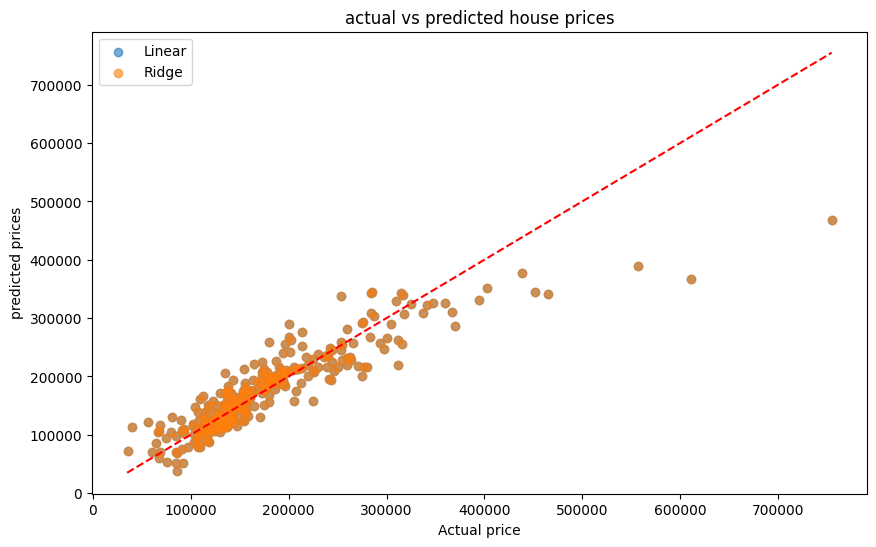

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, pred_lr, alpha=0.6, label="Linear")
plt.scatter(y_test, pred_lr, alpha=0.6, label="Ridge")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual price")
plt.ylabel("predicted prices")
plt.title("actual vs predicted house prices")
plt.legend()
plt.show()

test.csv

In [20]:
test_df=pd.read_csv("test.csv")
X_test_final=test_df[features] #same features as in training
X_test_final.fillna(X_train.mean(), inplace=True) #filling missing values
test_data=pd.get_dummies(X_test_final, columns=['Neighborhood'], drop_first=True)

X_test_final_scaled= scaler.transform(test_data) #to scale features
final_predictions=ridge_model.predict(X_test_final_scaled)
test_df['Predicted_SalePrice']= final_predictions

test_df[['Id', 'Predicted_SalePrice']].to_csv('Test_submission.csv', index=False)

print(test_df[['Id', 'Predicted_SalePrice']].head(1458))


        Id  Predicted_SalePrice
0     1461        109972.994532
1     1462        147254.794257
2     1463        193391.290081
3     1464        192246.748163
4     1465        253165.913738
...    ...                  ...
1453  2914         78551.412876
1454  2915         78551.412876
1455  2916         93997.584787
1456  2917        148860.787450
1457  2918        107736.311884

[1458 rows x 2 columns]


<ipython-input-20-df9ecc851602>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_final.fillna(X_train.mean(), inplace=True) #filling missing values


predicted successfully